# Phase 3: Asking meaningful questions that need to be answered

Cài đặt thêm thư viện ipynb để có thể import các variable từ các file notebook khác

In [87]:
! pip install ipynb

In [88]:
import sys  
sys.path.insert(0, '../phase_1_data_collection')
sys.path.insert(0, '../phase_2_data_exploration')

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
%store -r df_titles
%store -r df_credits

df_titles = df_titles
df_credits = df_credits

In [95]:
df_titles.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,main_production_countries,main_genre
0,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",US,26.0,tt0850645,8.6,1092.0,15.424,7.6,US,comedy
1,tm19248,The General,MOVIE,1926,NONE,78,"action, drama, war, western, comedy, european",US,0.0,tt0017925,8.2,89766.0,8.647,8.0,US,action
2,tm82253,The Best Years of Our Lives,MOVIE,1946,NONE,171,"romance, war, drama",US,0.0,tt0036868,8.1,63026.0,8.435,7.8,US,romance
3,tm83884,His Girl Friday,MOVIE,1940,NONE,92,"comedy, drama, romance",US,0.0,tt0032599,7.8,57835.0,11.270,7.4,US,comedy
4,tm56584,In a Lonely Place,MOVIE,1950,NONE,94,"thriller, drama, romance",US,0.0,tt0042593,7.9,30924.0,8.273,7.6,US,thriller


In [96]:
df_credits.head()

,id,name,character,role
0,ts20945,Joe Besser,Joe,ACTOR
1,ts20945,Moe Howard,Moe,ACTOR
2,ts20945,Larry Fine,Larry,ACTOR
3,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [99]:
df_data = df_titles.merge(df_credits, on='id', how='inner')
df_data.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,main_production_countries,main_genre,name,character,role
0,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",US,26.0,tt0850645,8.6,1092.0,15.424,7.6,US,comedy,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",US,26.0,tt0850645,8.6,1092.0,15.424,7.6,US,comedy,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",US,26.0,tt0850645,8.6,1092.0,15.424,7.6,US,comedy,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,1926,NONE,78,"action, drama, war, western, comedy, european",US,0.0,tt0017925,8.2,89766.0,8.647,8.0,US,action,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,1926,NONE,78,"action, drama, war, western, comedy, european",US,0.0,tt0017925,8.2,89766.0,8.647,8.0,US,action,Marion Mack,Annabelle Lee,ACTOR


### Which genres have the highest ratings (based on imdb & tmdb score) of all time?

In [101]:
genre_score = df_data[df_data['main_genre']!=''].loc[:, ['main_genre', 'imdb_score', 'tmdb_score']].drop_duplicates().reset_index(drop=True)
genre_score

,main_genre,imdb_score,tmdb_score
0,comedy,8.6,7.6
1,action,8.2,8.0
2,romance,8.1,7.8
3,comedy,7.8,7.4
4,thriller,7.9,7.6
...,...,...,...
9285,reality,6.1,NaN
9286,romance,6.0,7.5
9287,romance,4.4,5.3
9288,drama,4.2,7.3


In [102]:
genre_score['avg_score'] = genre_score.loc[:, ['imdb_score', 'tmdb_score']].mean(axis=1)
genre_score

,main_genre,imdb_score,tmdb_score,avg_score
0,comedy,8.6,7.6,8.10
1,action,8.2,8.0,8.10
2,romance,8.1,7.8,7.95
3,comedy,7.8,7.4,7.60
4,thriller,7.9,7.6,7.75
...,...,...,...,...
9285,reality,6.1,NaN,6.10
9286,romance,6.0,7.5,6.75
9287,romance,4.4,5.3,4.85
9288,drama,4.2,7.3,5.75


In [108]:
genre_score_table = pd.pivot_table(genre_score, values='avg_score', index='main_genre', aggfunc=np.mean)
genre_score_table

,avg_score
main_genre,
action,6.132545
animation,6.759571
comedy,6.113313
crime,6.405011
documentation,6.846605
drama,6.360242
european,5.930000
family,6.391398
fantasy,6.179577


<AxesSubplot:ylabel='main_genre'>

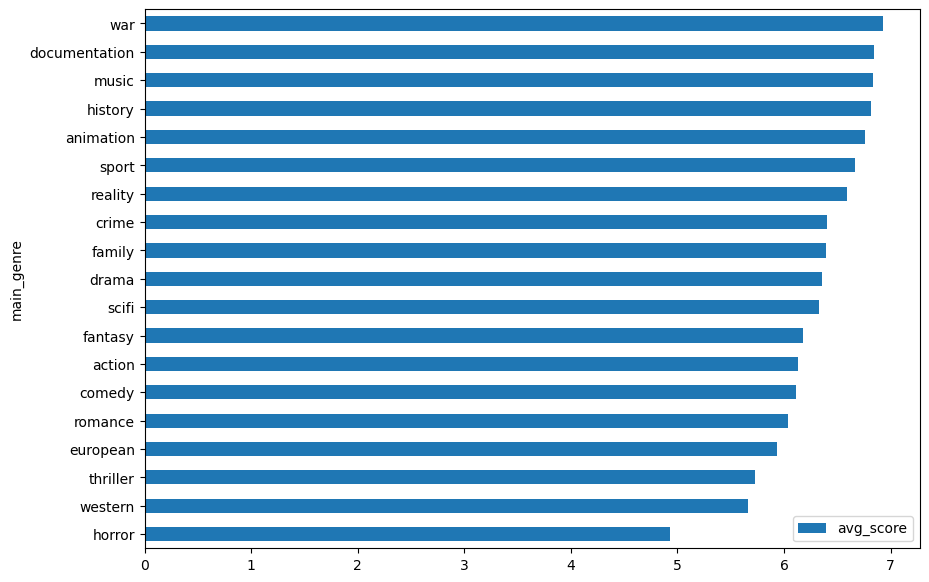

In [127]:
genre_score_table.sort_values(by='avg_score').plot.barh(figsize=(10, 7))